# Dependency Import

In [2]:
!pip install xgboost


     |████████████████████████████████| 2.1 MB 2.1 MB/s eta 0:00:01


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv('diabetes_prediction_india.csv')  

# Convert categorical variables to numeric
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Exploratory Data Analysis (EDA)

In [8]:

df.describe()



,Age,Gender,BMI,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,...,Health_Insurance,Regular_Checkups,Medication_For_Chronic_Conditions,Pregnancies,Polycystic_Ovary_Syndrome,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Thyroid_Condition,Diabetes_Status
count,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,...,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000
mean,48.417989,0.996599,27.459883,0.496599,1.003401,0.979781,1.002457,1.003023,0.984127,0.512850,...,0.504346,0.501701,0.501323,1.493386,0.492630,135.011867,29.909883,5.258743,0.510204,0.510960
std,18.040544,0.813087,7.194187,0.500036,0.818647,0.819674,0.819689,0.818418,0.818038,0.499882,...,0.500028,0.500044,0.500045,2.677414,0.755589,37.541696,11.527951,2.754500,0.499943,0.499927
min,18.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,70.100000,10.000000,0.500000,0.000000,0.000000
25%,33.000000,0.000000,21.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,102.175000,20.000000,2.880000,0.000000,0.000000
50%,48.000000,1.000000,27.400000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,136.000000,29.800000,5.270000,1.000000,1.000000
75%,64.000000,2.000000,33.600000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,167.100000,39.900000,7.660000,1.000000,1.000000
max,79.000000,2.000000,40.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,9.000000,2.000000,200.000000,50.000000,10.000000,1.000000,1.000000


In [9]:

# Check for missing values
df.isnull().sum()

Age                                  0
Gender                               0
BMI                                  0
Family_History                       0
Physical_Activity                    0
Diet_Type                            0
Smoking_Status                       0
Alcohol_Intake                       0
Stress_Level                         0
Hypertension                         0
Cholesterol_Level                    0
Fasting_Blood_Sugar                  0
Postprandial_Blood_Sugar             0
HBA1C                                0
Heart_Rate                           0
Waist_Hip_Ratio                      0
Urban_Rural                          0
Health_Insurance                     0
Regular_Checkups                     0
Medication_For_Chronic_Conditions    0
Pregnancies                          0
Polycystic_Ovary_Syndrome            0
Glucose_Tolerance_Test_Result        0
Vitamin_D_Level                      0
C_Protein_Level                      0
Thyroid_Condition        

# Distribution Analysis

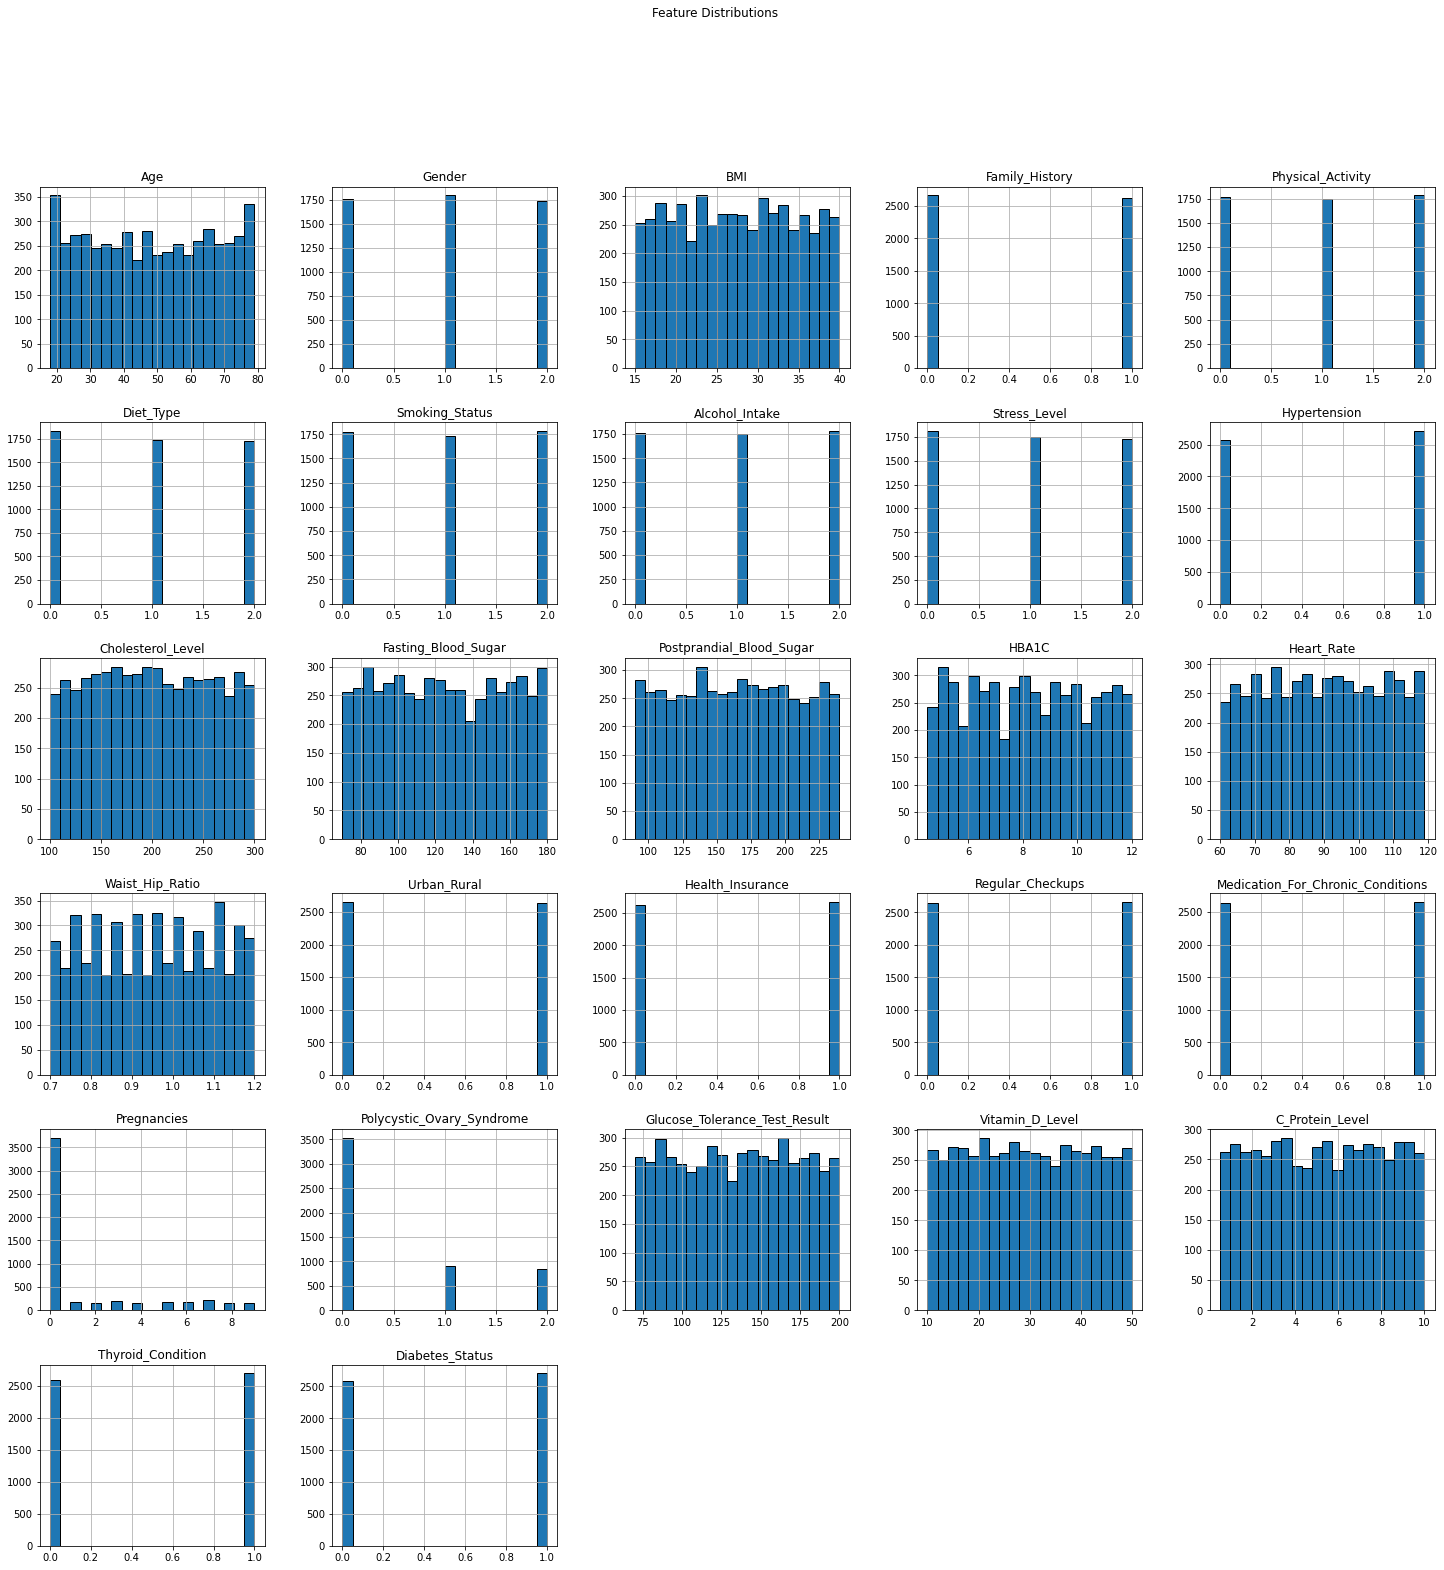

In [24]:
# Plot histograms for key numerical features
df.hist(figsize=(25, 25), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions")
plt.show()


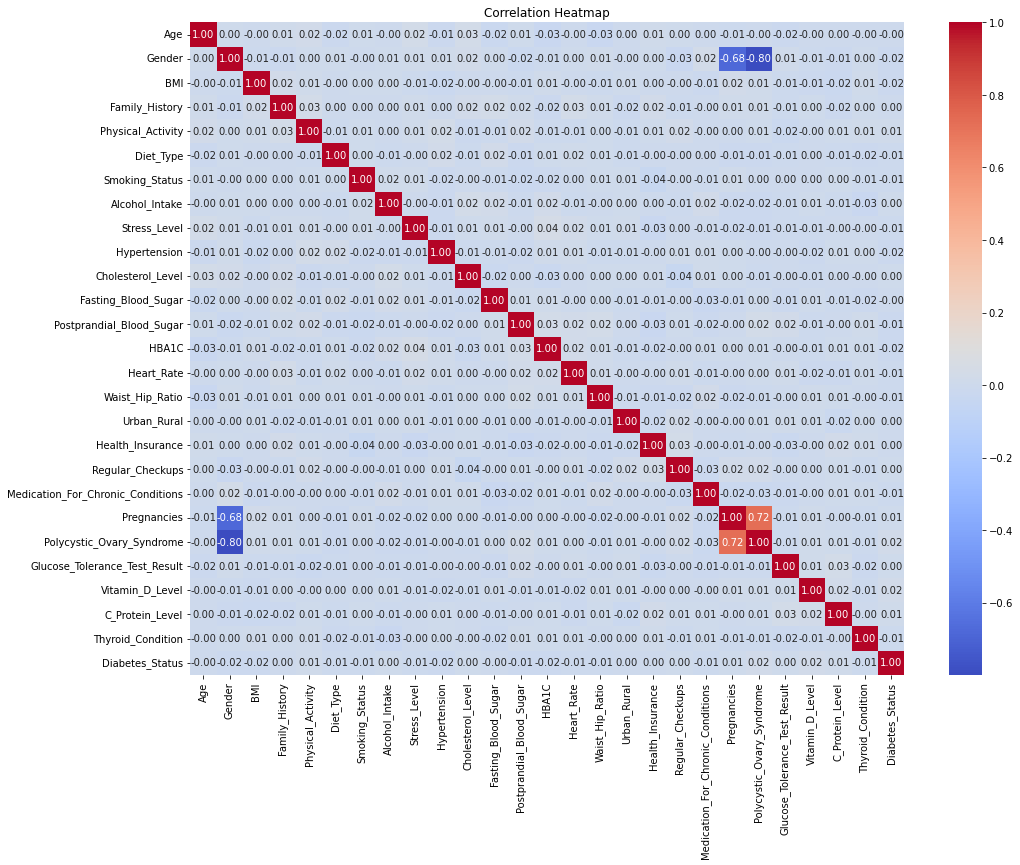

In [15]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


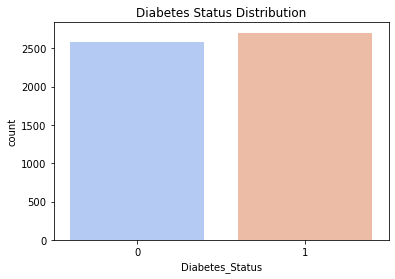

In [25]:
# Count plot for Diabetes_Status
sns.countplot(x=df["Diabetes_Status"], palette="coolwarm")
plt.title("Diabetes Status Distribution")
plt.show()


In [26]:
# Define features and target variable
X = df.drop(columns=['Diabetes_Status'])
y = df['Diabetes_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [27]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

# Print classification reports
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb))


/Users/apple/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:43:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.49      0.34      0.40       518
           1       0.51      0.66      0.57       541

    accuracy                           0.50      1059
   macro avg       0.50      0.50      0.49      1059
weighted avg       0.50      0.50      0.49      1059

Random Forest Report:
               precision    recall  f1-score   support

           0       0.47      0.41      0.44       518
           1       0.49      0.55      0.52       541

    accuracy                           0.48      1059
   macro avg       0.48      0.48      0.48      1059
weighted avg       0.48      0.48      0.48      1059

XGBoost Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50       518
           1       0.53      0.55      0.54       541

    accuracy                           0.52      1059
   macro avg       0.52      0.52      0.52      1059
weigh

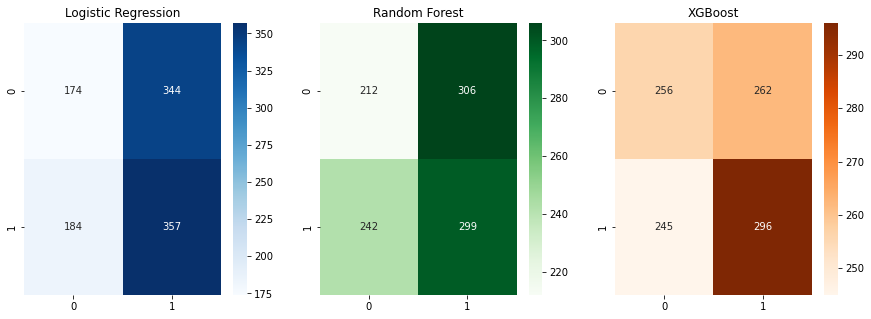

In [28]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest")

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("XGBoost")

plt.show()


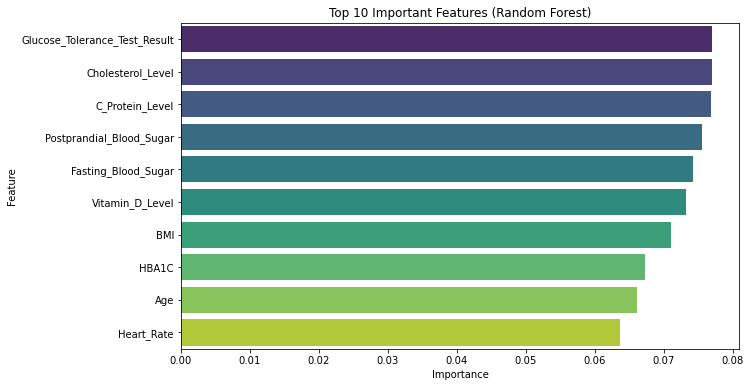

In [29]:
# Feature Importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf_clf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances[:10], palette="viridis")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


In [30]:
# new target variable
X_reg = df.drop(columns=['HBA1C'])
y_reg = df['HBA1C']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)
y_pred_lr = lr.predict(X_test_reg)

print("Linear Regression R^2 Score:", lr.score(X_test_reg, y_test_reg))


Linear Regression R^2 Score: -0.0027725452718081467


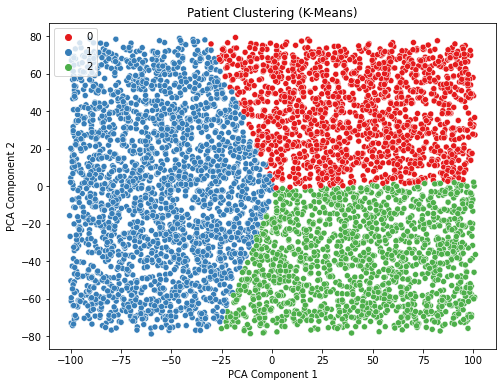

In [31]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set1")
plt.title("Patient Clustering (K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


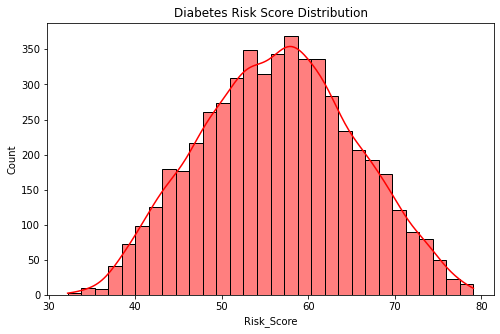

In [32]:
# Compute Risk Score based on key factors
df["Risk_Score"] = (df["BMI"] * 0.3) + (df["HBA1C"] * 0.4) + (df["Fasting_Blood_Sugar"] * 0.2) + (df["Cholesterol_Level"] * 0.1)

# Visualize Risk Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Risk_Score"], bins=30, kde=True, color="red")
plt.title("Diabetes Risk Score Distribution")
plt.show()


# Model Deployment

In [33]:
import joblib

# Save models
joblib.dump(log_reg, "logistic_regression.pkl")
joblib.dump(rf_clf, "random_forest.pkl")
joblib.dump(xgb_clf, "xgboost.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [ ]:
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load models
log_reg = joblib.load("logistic_regression.pkl")
scaler = joblib.load("scaler.pkl")

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.json  # Expecting JSON input
    features = np.array(data["features"]).reshape(1, -1)  # Convert to 2D array
    features_scaled = scaler.transform(features)
    prediction = log_reg.predict(features_scaled)[0]  # Get prediction
    return jsonify({"prediction": int(prediction)})

if __name__ == "__main__":
    app.run(debug=True)


In [37]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes_prediction_india.csv")  # Update the correct file path

# Encode categorical variables
df = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Split data
X = df.drop(columns=["Diabetes_Status"])
y = df["Diabetes_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Save trained model
joblib.dump(rf_clf, "random_forest_optimized.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model saved successfully!")


Model saved successfully!


In [35]:
import pandas as pd

# Load dataset
df = pd.read_csv("diabetes_prediction_india.csv")

# Drop the target column
feature_columns = df.drop(columns=["Diabetes_Status"]).columns.tolist()

# Print feature names
print(feature_columns)


['Age', 'Gender', 'BMI', 'Family_History', 'Physical_Activity', 'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level', 'Hypertension', 'Cholesterol_Level', 'Fasting_Blood_Sugar', 'Postprandial_Blood_Sugar', 'HBA1C', 'Heart_Rate', 'Waist_Hip_Ratio', 'Urban_Rural', 'Health_Insurance', 'Regular_Checkups', 'Medication_For_Chronic_Conditions', 'Pregnancies', 'Polycystic_Ovary_Syndrome', 'Glucose_Tolerance_Test_Result', 'Vitamin_D_Level', 'C_Protein_Level', 'Thyroid_Condition']
